<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd



%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
# Read CSV
house_csv = pd.read_csv('C://Users/monic/Desktop/data science -insitute of dat/DATA/Sacramento_transactions.csv')

In [3]:
pd.isnull(house_csv).sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [4]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
house_csv['sale_date'] = pd.to_datetime(house_csv['sale_date'])


C:\Users\monic\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [31]:
# ANSWER target variable is price which will be predicted based on other independent variables

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [32]:
# ANSWER beds, baths, type, sq__ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [9]:
# ANSWER
house_csv.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


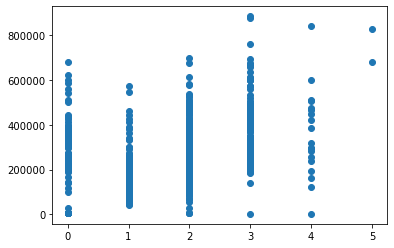

In [13]:
import matplotlib.pyplot as plt
plt.scatter(house_csv['baths'],house_csv['price'])

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [15]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [18]:
# ANSWER

X = house_csv['sq__ft'].values.reshape(-1,1)
Y = house_csv['price']
linreg = LinearRegression()
linreg.fit(X,Y)

print(linreg.coef_,linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [19]:
# ANSWER
linreg.score(X,Y)

0.11148717682951437

### 3. Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [26]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [32]:
# ANSWER
## Check training/test data
print(X_train)
print(y_train)

[[   0]
 [   0]
 [1424]
 [3037]
 [1373]
 [1766]
 [3260]
 [1685]
 [1904]
 [1202]
 [1009]
 [   0]
 [1344]
 [1598]
 [1006]
 [   0]
 [   0]
 [1302]
 [   0]
 [1376]
 [1436]
 [ 810]
 [   0]
 [1206]
 [1624]
 [1324]
 [1161]
 [   0]
 [1410]
 [1089]
 [1327]
 [1291]
 [2725]
 [   0]
 [1202]
 [1713]
 [1516]
 [1099]
 [1915]
 [1159]
 [1182]
 [2581]
 [   0]
 [3134]
 [1443]
 [1098]
 [1578]
 [1204]
 [2789]
 [1039]
 [1656]
 [2325]
 [1004]
 [1810]
 [1720]
 [ 539]
 [1032]
 [   0]
 [1548]
 [ 990]
 [1273]
 [1799]
 [   0]
 [1294]
 [1112]
 [2155]
 [1843]
 [3134]
 [1187]
 [1089]
 [   0]
 [ 723]
 [1249]
 [1252]
 [   0]
 [   0]
 [1152]
 [1266]
 [1394]
 [1638]
 [2462]
 [1089]
 [1488]
 [3838]
 [1127]
 [1616]
 [1520]
 [   0]
 [   0]
 [2214]
 [2053]
 [1211]
 [   0]
 [2960]
 [1118]
 [1215]
 [1161]
 [2258]
 [1446]
 [1264]
 [1410]
 [1146]
 [1158]
 [1382]
 [1580]
 [1118]
 [1921]
 [2187]
 [ 722]
 [2660]
 [1961]
 [2016]
 [ 844]
 [   0]
 [ 836]
 [1449]
 [1468]
 [2605]
 [3992]
 [1320]
 [1320]
 [   0]
 [1456]
 [2790]
 [ 933]


In [31]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [33]:
# ANSWER

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[55.55735276] 160765.8561610982


In [34]:
# ANSWER
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
linreg.score(X_test,y_test)

0.0840631844528853

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [35]:
# ANSWER
linreg.intercept_, linreg.coef_

(160765.8561610982, array([55.55735276]))

In [37]:
beta0 = linreg.intercept_
beta1 = linreg.coef_
X=1204

Ypred = beta1*X + beta0
Ypred

array([227656.90888289])

#### Find the error

In [38]:
# Predict price from X_test
y_predT = linreg.predict(X_test)
y_predT

array([360716.7687406 , 210989.7030552 , 230101.43240428, 368883.69959617,
       160765.8561611 , 274880.658728  , 248879.81763681, 205045.06630999,
       244768.57353265, 160765.8561611 , 226767.99123874, 233101.52945327,
       238768.37943468, 299159.22188367, 318882.0821131 , 308103.95567786,
       160765.8561611 , 210767.47364416, 160765.8561611 , 160765.8561611 ,
       160765.8561611 , 281436.42635356, 160765.8561611 , 235823.83973845,
       256213.38820099, 213989.80010418, 160765.8561611 , 213656.45598763,
       274602.87196421, 262435.81171   , 234546.020625  , 222712.30448734,
       257380.09260893, 299325.89394195, 231045.90740118, 292936.79837467,
       250102.07939751, 298770.32041436, 292547.89690535, 224434.58242287,
       226101.30300564, 268491.56316072, 254268.88085443, 227934.69564668,
       160765.8561611 , 230379.21916808, 245713.04852955, 160765.8561611 ,
       160765.8561611 , 218545.50303042, 160765.8561611 , 225712.40153632,
       215989.86480351, 1

In [40]:
#TO FIND ERROR
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predT, squared=True)

17545690290.29107



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



